In [ ]:
#getting started with neural networks

import keras
from keras import layers, models, Sequential
from keras.models import Sequential
from keras.utils import to_categorical
from keras import optimizers
import numpy as np

layer = layers.Dense(32, input_shape=(784))  #784 - 32 output layers

model = models.Sequential()
model.add(layers.Dense(32, input_shape=(784,)))
model.add(layers.Dense(10))

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='mse',
              metrics=['accuracy'])

model.fit(input_tensor, target_tensor, batch_size=128, epochs=10)




/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 100ms/step - accuracy: 0.6903 - loss: 0.5968 - val_accuracy: 0.8665 - val_loss: 0.3979
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.8910 - loss: 0.3468 - val_accuracy: 0.8802 - val_loss: 0.3207
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9156 - loss: 0.2593 - val_accuracy: 0.8890 - val_loss: 0.2858
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9365 - loss: 0.1998 - val_accuracy: 0.8888 - val_loss: 0.2794
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.9462 - loss: 0.1752 - val_accuracy: 0.8809 - val_loss: 0.2934
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9524 - loss: 0.1491 - val_accuracy: 0.8877 - val_loss: 0.2809
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9638 - loss: 0.1218 - val_accuracy: 0.8844 - val_loss: 0.2999
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9682 - loss: 0.1082 - val_accuracy: 0.8814 - 

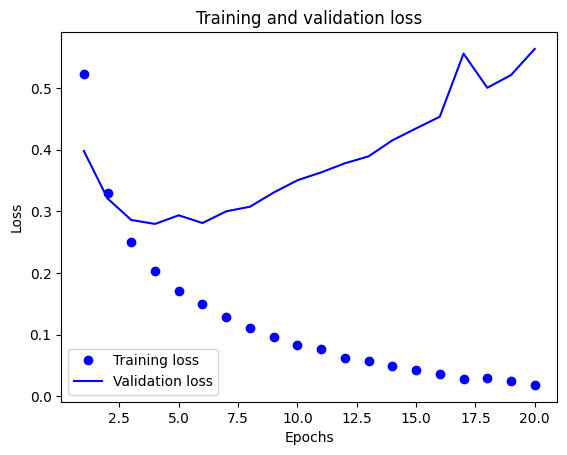

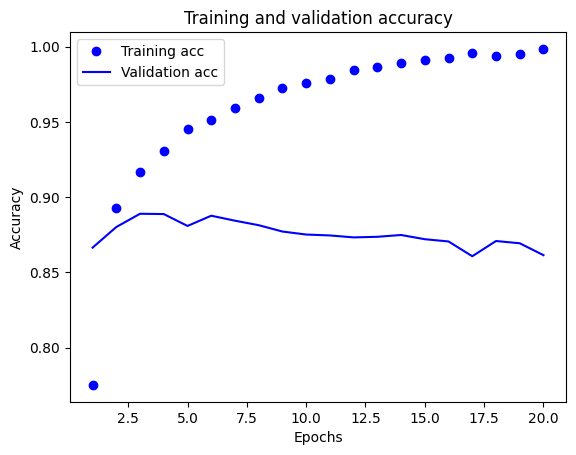

In [4]:
#imdb dataset

import keras
from keras import layers, models
from keras.models import Sequential
from keras.datasets import imdb
from keras import optimizers, losses, metrics
import numpy as np


(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000) #будет сохранено 10000 наиболее использованых слов в отзывах

word_index = imdb.get_word_index()
reverse_word_index =  dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join(
    [reverse_word_index.get(i - 3, '?') for i in train_data[0]])


def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1
  return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

x_train[0]

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

# каждый слой Dense с функцией активации relu руализует цепочку операций с тензорами:
# output = relu(dot(W, input) + b)

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
# функция вывода сигмоид будет сравнивать вероятность между 1 и 0
# чтобы отнести отзыв к положительным или негативным

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# создание проверочного набора

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

# обучение модели

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

# history - словарь с данными обо всём проиходившем в процессе обучения

history_dict =  history.history
history_dict.keys()

import matplotlib.pyplot as plt

loss_values = history_dict['loss']
val_loss_values =  history_dict['val_loss']
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

epochs = range(1, len(acc_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')  # bo - blue dot
plt.plot(epochs, val_loss_values, 'b', label='Validation loss') # b - solid blue line
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()



plt.clf()

plt.plot(epochs, acc_values, 'bo', label='Training acc')  # bo - blue dot
plt.plot(epochs, val_acc_values, 'b', label='Validation acc') # b - solid blue line
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()